# Lab 4

## Imports

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 9]

In [36]:
data = pd.read_csv('./data/Position_Salaries.csv', encoding='latin-1')

## Preprocessing

In [42]:
data.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


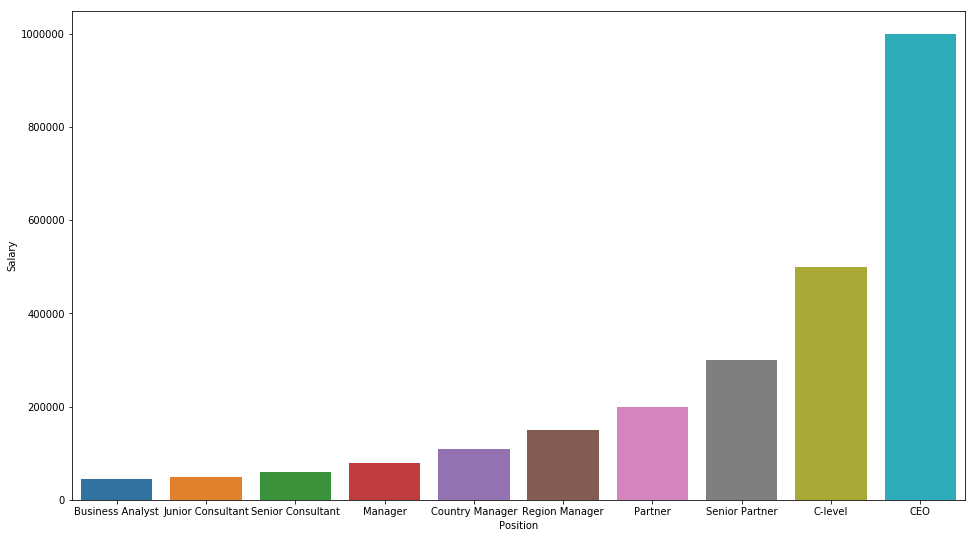

In [49]:
sns.barplot(x=data['Position'], y=data['Salary'])

/Users/abhishek/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


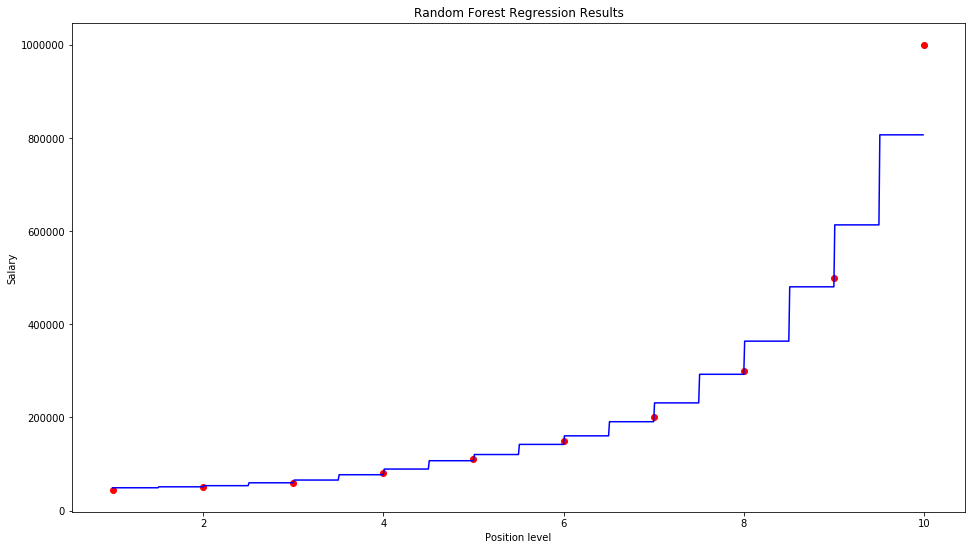

In [50]:
X = data.iloc[:, 1:2].values
Y = data.iloc[:, 2].values

# Fitting the Regression model to the dataset

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X,Y)


# Visualising the Random Forest Regression results in higher resolution and smoother curve
X_Grid = np.arange(min(X), max(X), 0.01)
X_Grid = X_Grid.reshape((len(X_Grid), 1))
plt.scatter(X,Y, color = 'red')
plt.plot(X_Grid, regressor.predict(X_Grid), color = 'blue')
plt.title('Random Forest Regression Results')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## GRE Dataset

In [52]:
gre_data = pd.read_csv('./data/gre.csv', encoding='latin-1')
gre_data.head()

,Serial No.,Student Name,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,1,Lakshmi GagraniÊ,337,118,4,4.5,4.5,9.65,1,Y
1,2,Vikrant JohalÊ,324,107,4,4.0,4.5,8.87,1,N
2,3,Kim SabharwalÊ,316,104,3,3.0,3.5,8.00,1,N
3,4,Munni DaniÊ,322,110,3,3.5,2.5,8.67,1,N
4,5,Madhu IyengarÊ,314,103,2,2.0,3.0,8.21,0,N


In [54]:
gre_data = gre_data.drop(['Serial No.', 'Student Name'], axis=1)
gre_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,Y
1,324,107,4,4.0,4.5,8.87,1,N
2,316,104,3,3.0,3.5,8.00,1,N
3,322,110,3,3.5,2.5,8.67,1,N
4,314,103,2,2.0,3.0,8.21,0,N


In [61]:
for key in gre_data.keys():
    if key == 'Admitted':
        continue
    print(gre_data[key].groupby(gre_data['Admitted']).mean())

Admitted
N    313.853488
Y    332.557143
Name: GRE Score, dtype: float64
Admitted
N    105.725581
Y    116.200000
Name: TOEFL Score, dtype: float64
Admitted
N    2.876744
Y    4.571429
Name: University Rating, dtype: float64
Admitted
N    3.183721
Y    4.542857
Name: SOP, dtype: float64
Admitted
N    3.324419
Y    4.464286
Name: LOR , dtype: float64
Admitted
N    8.426442
Y    9.497857
Name: CGPA, dtype: float64
Admitted
N    0.488372
Y    1.000000
Name: Research, dtype: float64


## In-Lab 2

In [2]:
import pandas as pd

data = pd.read_csv("./data/petrol_consumption.csv")
data.head()
# data.info()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values
print(X)
print(y)

[[9.0000e+00 3.5710e+03 1.9760e+03 5.2500e-01]
 [9.0000e+00 4.0920e+03 1.2500e+03 5.7200e-01]
 [9.0000e+00 3.8650e+03 1.5860e+03 5.8000e-01]
 [7.5000e+00 4.8700e+03 2.3510e+03 5.2900e-01]
 [8.0000e+00 4.3990e+03 4.3100e+02 5.4400e-01]
 [1.0000e+01 5.3420e+03 1.3330e+03 5.7100e-01]
 [8.0000e+00 5.3190e+03 1.1868e+04 4.5100e-01]
 [8.0000e+00 5.1260e+03 2.1380e+03 5.5300e-01]
 [8.0000e+00 4.4470e+03 8.5770e+03 5.2900e-01]
 [7.0000e+00 4.5120e+03 8.5070e+03 5.5200e-01]
 [8.0000e+00 4.3910e+03 5.9390e+03 5.3000e-01]
 [7.5000e+00 5.1260e+03 1.4186e+04 5.2500e-01]
 [7.0000e+00 4.8170e+03 6.9300e+03 5.7400e-01]
 [7.0000e+00 4.2070e+03 6.5800e+03 5.4500e-01]
 [7.0000e+00 4.3320e+03 8.1590e+03 6.0800e-01]
 [7.0000e+00 4.3180e+03 1.0340e+04 5.8600e-01]
 [7.0000e+00 4.2060e+03 8.5080e+03 5.7200e-01]
 [7.0000e+00 3.7180e+03 4.7250e+03 5.4000e-01]
 [7.0000e+00 4.7160e+03 5.9150e+03 7.2400e-01]
 [8.5000e+00 4.3410e+03 6.0100e+03 6.7700e-01]
 [7.0000e+00 4.5930e+03 7.8340e+03 6.6300e-01]
 [8.0000e+00 

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(
    n_estimators=20,
    oob_score=True
)

/Users/abhishek/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [7]:
regressor.fit(X_train, y_train)

print(regressor.oob_score_)

0.5414794570223096


## Post Lab

In [1]:
import pandas as pd

data = pd.read_csv('./data/transfusion_data.csv')
print(data.columns)
print("=" * 100)
print(data.info())

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
Recency (months)                              748 non-null int64
Frequency (times)                             748 non-null int64
Monetary (c.c. blood)                         748 non-null int64
Time (months)                                 748 non-null int64
whether he/she donated blood in March 2007    748 non-null int64
dtypes: int64(5)
memory usage: 29.3 KB
None


In [2]:
data.rename(columns={
    'whether he/she donated blood in March 2007': 'target',
    'Recency (months)': 'recency',
    'Frequency (times)': 'freq',
    'Monetary (c.c. blood)': 'monetary',
    'Time (months)': 'time'
}, inplace=True)
data.head()

,recency,freq,monetary,time,target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    data.iloc[:, 0:-1].values, 
    data.iloc[:, -1].values, 
    test_size=0.25, 
    random_state=0
)

In [8]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=5)
regressor.fit(x_train, y_train)
print(regressor.score(x_test, y_test))
print(regressor.predict([[3, 33, 7900, 77]]))

0.7112299465240641
[1]
